In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the dataset
df = pd.read_csv('C:/Users/satyam/Desktop/Data Science/Supervised Linear Regression/Advanced-House-Price-Prediction--master/test.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
# Checking the number of observations and features
df.shape

(1459, 80)

In [4]:
# Chceking for the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [5]:
# Checking for the null values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

### Missing Values

In [6]:
missing_val = [feature for feature in df.columns if df[feature].isnull().sum()>0]

for feature in missing_val:
    print(feature, "has", np.round(df[feature].isnull().sum()/df.shape[0], 3), "% of missing value")

MSZoning has 0.003 % of missing value
LotFrontage has 0.156 % of missing value
Alley has 0.927 % of missing value
Utilities has 0.001 % of missing value
Exterior1st has 0.001 % of missing value
Exterior2nd has 0.001 % of missing value
MasVnrType has 0.011 % of missing value
MasVnrArea has 0.01 % of missing value
BsmtQual has 0.03 % of missing value
BsmtCond has 0.031 % of missing value
BsmtExposure has 0.03 % of missing value
BsmtFinType1 has 0.029 % of missing value
BsmtFinSF1 has 0.001 % of missing value
BsmtFinType2 has 0.029 % of missing value
BsmtFinSF2 has 0.001 % of missing value
BsmtUnfSF has 0.001 % of missing value
TotalBsmtSF has 0.001 % of missing value
BsmtFullBath has 0.001 % of missing value
BsmtHalfBath has 0.001 % of missing value
KitchenQual has 0.001 % of missing value
Functional has 0.001 % of missing value
FireplaceQu has 0.5 % of missing value
GarageType has 0.052 % of missing value
GarageYrBlt has 0.053 % of missing value
GarageFinish has 0.053 % of missing value

In [7]:
missing_val = [feature for feature in df.columns if df[feature].isnull().sum()>1]

for feature in missing_val:
    print(feature, 'has', np.round(df[feature].isnull().mean(), 3), '% of missing values')

MSZoning has 0.003 % of missing values
LotFrontage has 0.156 % of missing values
Alley has 0.927 % of missing values
Utilities has 0.001 % of missing values
MasVnrType has 0.011 % of missing values
MasVnrArea has 0.01 % of missing values
BsmtQual has 0.03 % of missing values
BsmtCond has 0.031 % of missing values
BsmtExposure has 0.03 % of missing values
BsmtFinType1 has 0.029 % of missing values
BsmtFinType2 has 0.029 % of missing values
BsmtFullBath has 0.001 % of missing values
BsmtHalfBath has 0.001 % of missing values
Functional has 0.001 % of missing values
FireplaceQu has 0.5 % of missing values
GarageType has 0.052 % of missing values
GarageYrBlt has 0.053 % of missing values
GarageFinish has 0.053 % of missing values
GarageQual has 0.053 % of missing values
GarageCond has 0.053 % of missing values
PoolQC has 0.998 % of missing values
Fence has 0.801 % of missing values
MiscFeature has 0.965 % of missing values


### Numerical Features

In [8]:
# List of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes!='O']

print("Number of numerical features are: {}".format(len(numerical_features)))

Number of numerical features are: 37


In [9]:
df[numerical_features].head(7)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010
5,1466,60,75.0,10000,6,5,1993,1994,0.0,0.0,...,440.0,157,84,0,0,0,0,0,4,2010
6,1467,20,NaN,7980,6,7,1992,2007,0.0,935.0,...,420.0,483,21,0,0,0,0,500,3,2010


### Temporal Variables (Ex: Datetime Variables)

In [10]:
# List of variables having the year information
year_features = [feature for feature in df.columns if 'Yr' in feature or 'Year' in feature]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [11]:
df[year_features].head(5)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,1961,1961,1961.0,2010
1,1958,1958,1958.0,2010
2,1997,1998,1997.0,2010
3,1998,1998,1998.0,2010
4,1992,1992,1992.0,2010


In [12]:
## Numerical Variable types: a. Discrete  b. Continuous

discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_features + ['Id']]
print("Discrete Variable Count: {}".format(len(discrete_feature)))

Discrete Variable Count: 16


In [15]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold']

In [18]:
df[discrete_feature].head(5)

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MoSold
0,20,5,6,0,0.0,0.0,1,0,2,1,5,0,1.0,0,0,6
1,20,6,6,0,0.0,0.0,1,1,3,1,6,0,1.0,0,0,6
2,60,5,5,0,0.0,0.0,2,1,3,1,6,1,2.0,0,0,3
3,60,6,6,0,0.0,0.0,2,1,3,1,7,1,2.0,0,0,6
4,120,8,5,0,0.0,0.0,2,0,2,1,5,0,2.0,0,0,1


### Continuous Variable

In [20]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature + year_features+ ['Id']]
print("Continuous Feature Count: {}".format(len(continuous_feature)))

Continuous Feature Count: 16


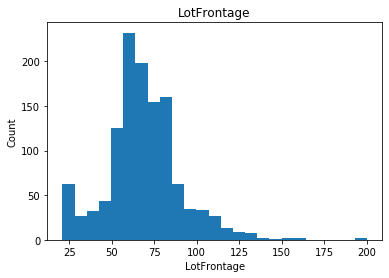

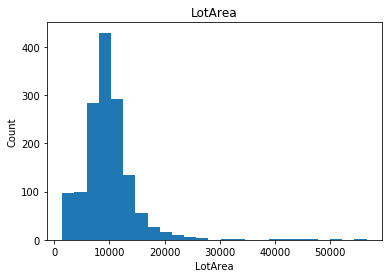

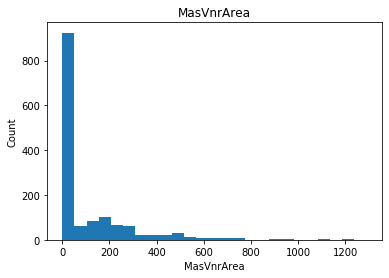

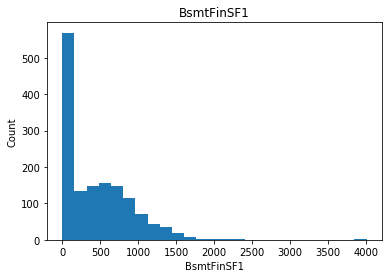

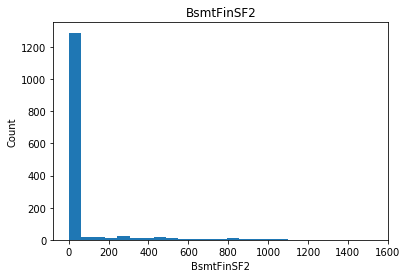

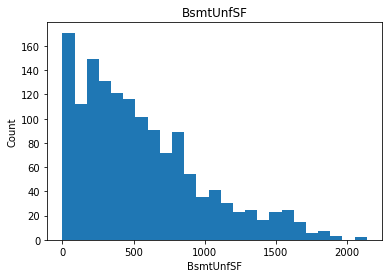

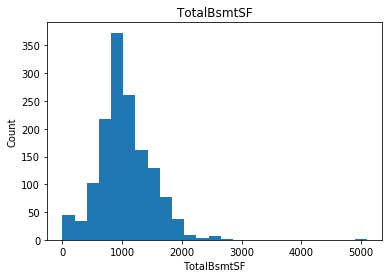

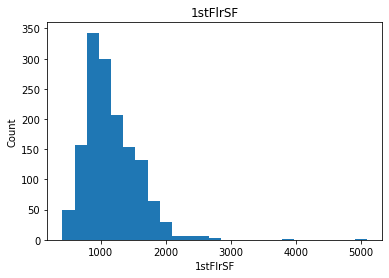

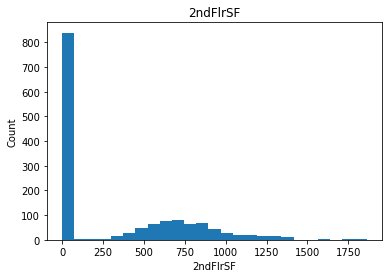

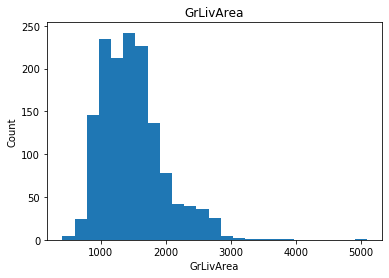

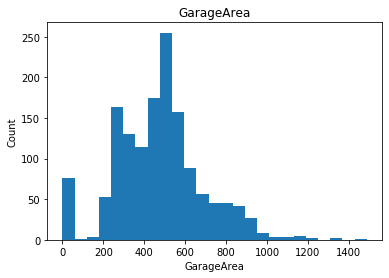

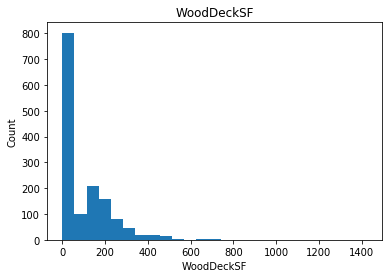

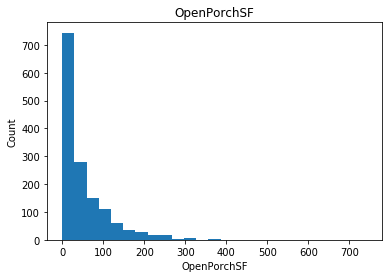

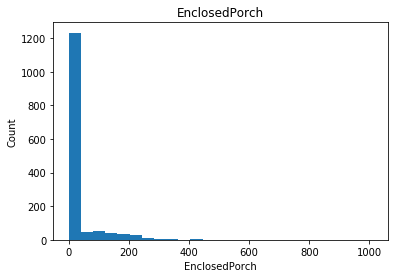

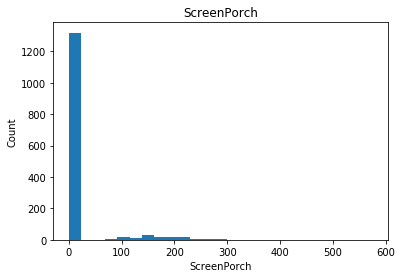

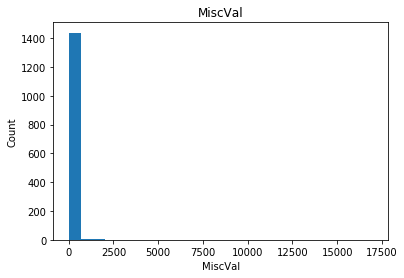

In [24]:
# Lets analyze the continuous values by creting histogram to understand the distribution

for feature in continuous_feature:
    df[feature].plot.hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

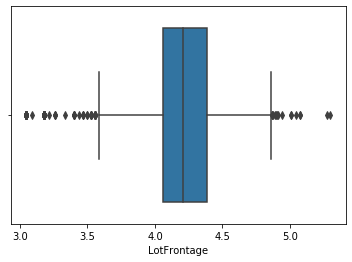

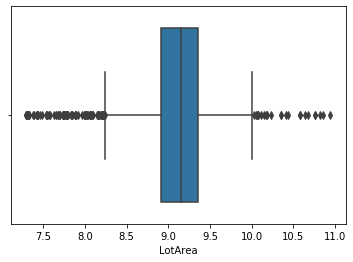

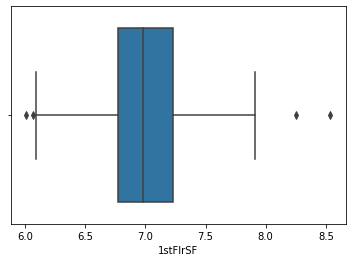

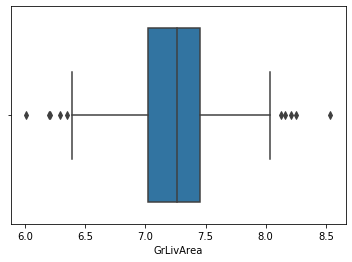

In [27]:
## Using Log Transformation for the data to be more interpretable & checking outliers

for feature in continuous_feature:
    df1 = df.copy()
    if 0 in df1[feature].unique():
        pass
    else:
        df1[feature] = np.log(df1[feature])
        sns.boxplot(df1[feature])
        plt.show()

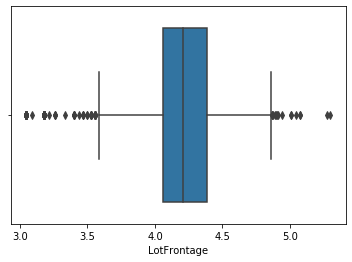

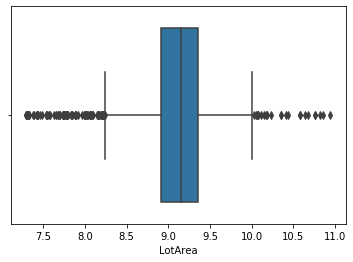

C:\Users\satyam\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\satyam\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1237: RuntimeWarning: invalid value encountered in double_scalars
  notch_max = med + 1.57 * iqr / np.sqrt(N)


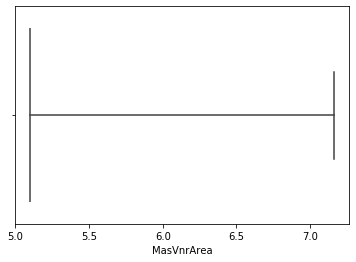

C:\Users\satyam\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


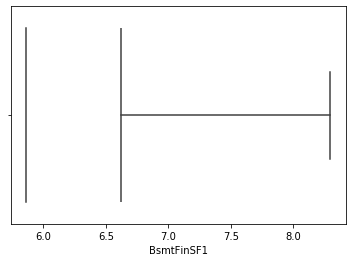

C:\Users\satyam\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\satyam\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1291: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
C:\Users\satyam\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\satyam\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]


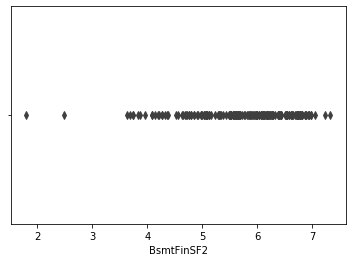

C:\Users\satyam\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


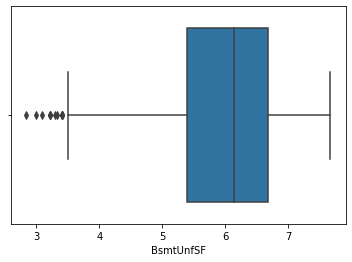

C:\Users\satyam\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


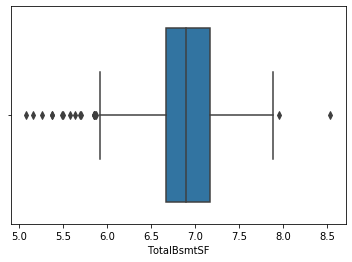

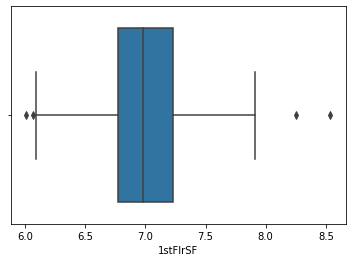

C:\Users\satyam\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\satyam\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


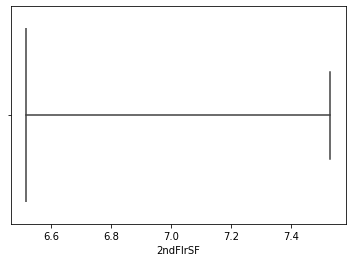

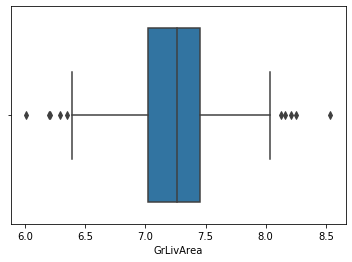

C:\Users\satyam\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


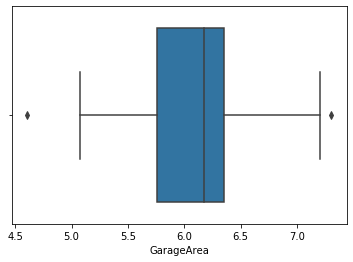

C:\Users\satyam\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\satyam\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


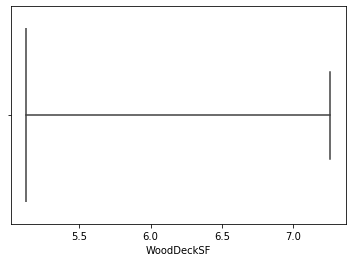

C:\Users\satyam\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


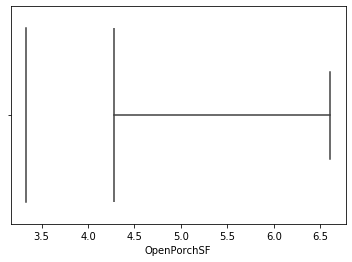

C:\Users\satyam\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\satyam\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
C:\Users\satyam\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1291: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
C:\Users\satyam\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\satyam\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]


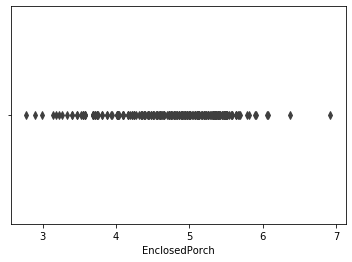

C:\Users\satyam\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\satyam\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
C:\Users\satyam\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1291: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
C:\Users\satyam\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\satyam\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]


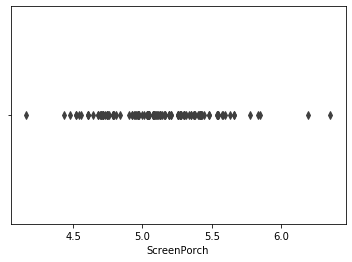

C:\Users\satyam\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\satyam\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
C:\Users\satyam\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1291: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
C:\Users\satyam\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\satyam\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]


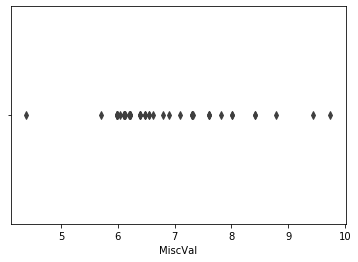

In [28]:
for feature in continuous_feature:
    df1 = df.copy()
    df1[feature] = np.log(df1[feature])
    sns.boxplot(df1[feature])
    plt.show()
    

 ### Categorical Features

In [31]:
categorical_features = [feature for feature in df1.columns if df1[feature].dtypes =='O']
print("Categorical feature count: {}".format(len(categorical_features)))

Categorical feature count: 43


In [33]:
df1[categorical_features].head(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [35]:
for feature in categorical_features:
    print('The feature is {} and the number of categories are {}.'.format(feature, len(df1[feature].unique())))

The feature is MSZoning and the number of categories are 6.
The feature is Street and the number of categories are 2.
The feature is Alley and the number of categories are 3.
The feature is LotShape and the number of categories are 4.
The feature is LandContour and the number of categories are 4.
The feature is Utilities and the number of categories are 2.
The feature is LotConfig and the number of categories are 5.
The feature is LandSlope and the number of categories are 3.
The feature is Neighborhood and the number of categories are 25.
The feature is Condition1 and the number of categories are 9.
The feature is Condition2 and the number of categories are 5.
The feature is BldgType and the number of categories are 5.
The feature is HouseStyle and the number of categories are 7.
The feature is RoofStyle and the number of categories are 6.
The feature is RoofMatl and the number of categories are 4.
The feature is Exterior1st and the number of categories are 14.
The feature is Exterior